In [1]:
import numpy as np
import os

In [2]:
import baobap as bao

In [3]:
from input_data import dynamical_regimes
from src import clustering_frequency_data

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter, LogFormatterSciNotation
from cycler import cycler
%matplotlib inline

In [5]:
# use the same colours as in the phase space plot
cmap = plt.get_cmap("Accent")
bounds = [-1, 0, 1, 2, 3]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

In [6]:
matplotlib.style.use("fast") 
matplotlib.rcParams.update({'font.size': 15,
                            'xtick.labelsize': 15,
                            'ytick.labelsize': 15,
                           'axes.prop_cycle': cycler(color=[cmap(norm(0)), cmap(norm(1)), cmap(norm(-1)), cmap(norm(2))],#["tab:purple", "blue", "r", "grey"],
                                                      linestyle=[(0, ()), (0, (5, 1)), (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1))])
                           })

reducedblue = (*cmap(norm(1))[:3], .6)
reducedgreen = (*cmap(norm(-1))[:3], .6)
reducedgrey = (*cmap(norm(2))[:3], .6)
hatches = [".", "\\", "//"]

In [7]:
def secondary_axis(ax, alphas, number_of_desync):
    avg_desync = np.mean(number_of_desync, axis=0)
    ax2 = ax.twinx()
    ax2.set_ylim(0, 30)
    ax2.yaxis.set_ticks_position('right')
    ax2.yaxis.set_label_position("right")
    ax2.spines['right'].set_color("tab:purple")
    ax2.tick_params(axis='y', colors="tab:purple")
    ax2.yaxis.label.set_color("tab:purple")
    ax2.plot(alphas, avg_desync, "k-", alpha=1, linewidth=2.5, color="tab:purple")
    if i == 2:
        ax2.set_ylabel(r"$\overline{N_d}$", rotation=0)
    else:
        ax2.set_yticklabels([])
    ax2.grid(False)

In [8]:
def main_plot(ax, alphas, result_dir, result_file, ana):
    number_of_desync, n_clusters, sync, solitary, exotic_solitary, composite, exotic_composite, other = clustering_frequency_data(result_dir, result_file, ana[3]) 
    ax.stackplot(alphas, 
                     np.mean(exotic_solitary, axis=0),
                     np.mean(exotic_composite, axis=0),
                     np.mean(solitary, axis=0),
                     np.mean(composite, axis=0),
                     np.mean(other, axis=0), 
                     np.mean(sync, axis=0), 
                     baseline="zero",
                     colors=[cmap(norm(-1)), reducedgreen, cmap(norm(1)), reducedblue, reducedgrey, cmap(norm(0))],
                     edgecolor="w"
                     )
    return number_of_desync

In [9]:
max_alpha = 0.3
batch_size = 1000.

simulation_data/resubmission/northern/cp_3_PK_0p167_D2KH_0p010
simulation_data/resubmission/northern/cp_3_PK_0p167_D2KH_0p10
simulation_data/resubmission/northern/cp_3_PK_0p167_D2KH_10
simulation_data/resubmission/northern/cp_3_PK_0p056_D2KH_0p010
simulation_data/resubmission/northern/cp_3_PK_0p056_D2KH_0p10
simulation_data/resubmission/northern/cp_3_PK_0p056_D2KH_10
simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_0p010
simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_0p10
simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_10
simulation_data/resubmission/northern/cp_1_PK_0p056_D2KH_0p010
simulation_data/resubmission/northern/cp_1_PK_0p056_D2KH_0p10
simulation_data/resubmission/northern/cp_1_PK_0p056_D2KH_10


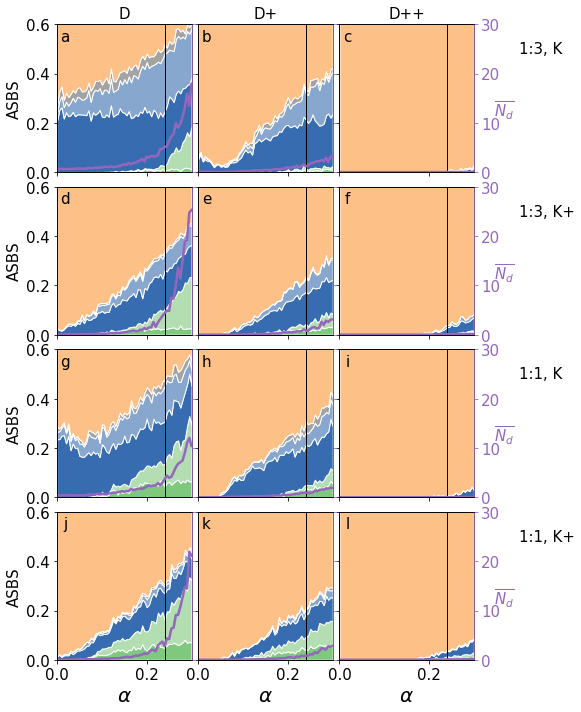

In [10]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=4, 
                             constrained_layout=False, 
                             sharex=True,
                             sharey=True,
                             gridspec_kw={"wspace":0.05, "hspace": 0.1, "left":0.1, "right":0.8})
fig1.set_size_inches((8.27, 11.69))

labels = "abcdefghijkl"

counter = 0
for row in f1_axes:
    for ax in row:
        ax.set_ylim(0, 0.6)
        ax.set_xlim(0, max_alpha)
        ax.axvline(x=0.24, c="k", linestyle="-", linewidth=1, zorder=10)
        ax.text(0.06, 0.92, labels[counter], ha='center', va='center', fontsize=15, transform=ax.transAxes)
        ax.grid(False)
        counter += 1
        
for i in range(4):
    f1_axes[i, 0].set_ylabel(r"ASBS")
    
for i in range(3):
    f1_axes[3, i].set_xlabel(r"$\alpha$", fontsize=20)

f1_axes[0, 2].text(.4, .5, "1:3, K", ha='left', va='center', fontsize=15)
f1_axes[1, 2].text(.4, .5, "1:3, K+", ha='left', va='center', fontsize=15)
f1_axes[2, 2].text(.4, .5, "1:1, K", ha='left', va='center', fontsize=15)
f1_axes[3, 2].text(.4, .5, "1:1, K+", ha='left', va='center', fontsize=15)

f1_axes[0, 0].set_title("D", fontsize=15)
f1_axes[0, 1].set_title("D+", fontsize=15)
f1_axes[0, 2].set_title("D++", fontsize=15)

# first row: Scandinavian grid, cp=3, P/K=0.167

for i, dr in enumerate(dynamical_regimes[6:9]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/northern", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[0, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[0, i], alphas, number_of_desync)

# second row: Scandinavian grid, cp=3, P/K=0.055

for i, dr in enumerate(dynamical_regimes[9:]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/northern", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[1, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[1, i], alphas, number_of_desync)
    
# third row: Scandinavian grid, cp=1, P/K=0.167

for i, dr in enumerate(dynamical_regimes[0:3]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/northern", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[2, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[2, i], alphas, number_of_desync)

    
# fourth row: Scandinavian grid, cp=1, P/K=0.055

for i, dr in enumerate(dynamical_regimes[3:6]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/northern", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[3, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[3, i], alphas, number_of_desync)

fig1.savefig("figures/northern.pdf", facecolor="w", bbox_inches = 'tight') 


simulation_data/resubmission/circle/cp_3_PK_0p167_D2KH_0p010
simulation_data/resubmission/circle/cp_3_PK_0p167_D2KH_0p10
simulation_data/resubmission/circle/cp_3_PK_0p167_D2KH_10
simulation_data/resubmission/circle/cp_3_PK_0p056_D2KH_0p010
simulation_data/resubmission/circle/cp_3_PK_0p056_D2KH_0p10
simulation_data/resubmission/circle/cp_3_PK_0p056_D2KH_10
simulation_data/resubmission/circle/cp_1_PK_0p167_D2KH_0p010
simulation_data/resubmission/circle/cp_1_PK_0p167_D2KH_0p10
simulation_data/resubmission/circle/cp_1_PK_0p167_D2KH_10
simulation_data/resubmission/circle/cp_1_PK_0p056_D2KH_0p010
simulation_data/resubmission/circle/cp_1_PK_0p056_D2KH_0p10
simulation_data/resubmission/circle/cp_1_PK_0p056_D2KH_10


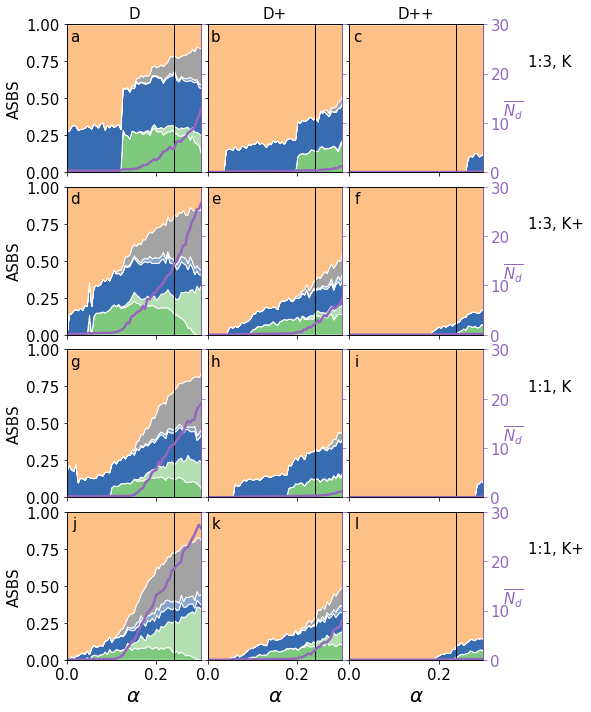

In [11]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=4, 
                             constrained_layout=False, 
                             sharex=True,
                             sharey=True,
                             gridspec_kw={"wspace":0.05, "hspace": 0.1, "left":0.1, "right":0.8})
fig1.set_size_inches((8.27, 11.69))

labels = "abcdefghijkl"

counter = 0
for row in f1_axes:
    for ax in row:
        ax.set_ylim(0, 1)
        ax.set_xlim(0, max_alpha)
        ax.axvline(x=0.24, c="k", linestyle="-", linewidth=1, zorder=10)
        ax.text(0.06, 0.92, labels[counter], ha='center', va='center', fontsize=15, transform=ax.transAxes)
        ax.grid(False)
        counter += 1
               
for i in range(4):
    f1_axes[i, 0].set_ylabel(r"ASBS")
    
for i in range(3):
    f1_axes[3, i].set_xlabel(r"$\alpha$", fontsize=20)

f1_axes[0, 2].text(.4, .75, "1:3, K", ha='left', va='center', fontsize=15)
f1_axes[1, 2].text(.4, .75, "1:3, K+", ha='left', va='center', fontsize=15)
f1_axes[2, 2].text(.4, .75, "1:1, K", ha='left', va='center', fontsize=15)
f1_axes[3, 2].text(.4, .75, "1:1, K+", ha='left', va='center', fontsize=15)

f1_axes[0, 0].set_title("D", fontsize=15)
f1_axes[0, 1].set_title("D+", fontsize=15)
f1_axes[0, 2].set_title("D++", fontsize=15)

# first row: circle grid, cp=3, P/K=0.167

for i, dr in enumerate(dynamical_regimes[6:9]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/circle", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[0, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[0, i], alphas, number_of_desync)

# second row: circle grid, cp=3, P/K=0.055

for i, dr in enumerate(dynamical_regimes[9:]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/circle", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[1, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[1, i], alphas, number_of_desync)
    
# third row: circle grid, cp=1, P/K=0.167

for i, dr in enumerate(dynamical_regimes[0:3]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/circle", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[2, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[2, i], alphas, number_of_desync)

    
# fourth row: circle grid, cp=1, P/K=0.055

for i, dr in enumerate(dynamical_regimes[3:6]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/circle", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[3, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[3, i], alphas, number_of_desync)

fig1.savefig("figures/circle.pdf", facecolor="w", bbox_inches = 'tight') 
